# ✅ Geração de dados fictícios no Python

In [5]:
# Instalar bibliotecas necessárias (rodar no Colab)
!pip install faker pandas numpy

import pandas as pd
import numpy as np
from faker import Faker
import random

# Inicializa gerador de dados
faker = Faker('pt_BR')
np.random.seed(42)
random.seed(42)

# Parâmetros
n_registros = 5000
clientes = [f"Cliente_{i}" for i in range(1, 21)]  # 20 clientes fictícios
regioes = ["Zona Norte", "Zona Sul", "Zona Leste", "Zona Oeste", "Centro"]
tipos_incidente = ["Furto", "Invasão", "Falha Sistema", "Falso Alarme"]
gravidades = ["Baixa", "Média", "Alta"]
resultados = ["Resolvido", "Não resolvido"]
tecnologias = ["Câmeras", "Alarmes", "Ronda", "Monitoramento Remoto"]

# Função para gerar dataset
def gerar_dados(n):
    dados = []
    for i in range(n):
        cliente = random.choice(clientes)
        regiao = random.choice(regioes)
        data_incidente = faker.date_between(start_date="-2y", end_date="today")
        hora = random.randint(0, 23)
        tipo = random.choices(tipos_incidente, weights=[0.3, 0.2, 0.2, 0.3])[0]
        gravidade = random.choices(gravidades, weights=[0.6, 0.3, 0.1])[0]
        tempo_resposta = random.randint(2, 60)
        resultado = random.choices(resultados, weights=[0.8, 0.2])[0]
        custo_incidente = round(np.random.exponential(2000), 2) if gravidade != "Baixa" else round(np.random.exponential(500), 2)
        custo_segurança = round(random.uniform(5000, 20000), 2)
        n_vigilantes = random.randint(1, 10)
        tecnologia = random.choice(tecnologias)

        dados.append([
            i+1, cliente, regiao, data_incidente, hora, tipo, gravidade,
            tempo_resposta, resultado, custo_incidente, custo_segurança,
            n_vigilantes, tecnologia
        ])

    colunas = ["id_incidente","cliente","regiao","data","hora","tipo_incidente","gravidade",
               "tempo_resposta","resultado","custo_incidente","custo_segurança",
               "n_vigilantes","tecnologia"]

    return pd.DataFrame(dados, columns=colunas)

# Gerar e salvar dataset
df = gerar_dados(n_registros)
df.to_csv("incidentes_seguranca.csv", index=False)
df.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.2 MB/s eta 0:00:00


,id_incidente,cliente,regiao,data,hora,tipo_incidente,gravidade,tempo_resposta,resultado,custo_incidente,custo_segurança,n_vigilantes,tecnologia
0,1,Cliente_4,Zona Norte,2023-11-12,23,Furto,Baixa,49,Resolvido,234.63,16110.02,9,Câmeras
1,2,Cliente_19,Zona Oeste,2024-08-08,1,Furto,Baixa,34,Resolvido,1505.06,13418.68,9,Monitoramento Remoto
2,3,Cliente_8,Zona Oeste,2024-06-16,18,Furto,Média,50,Não resolvido,2633.49,15472.09,6,Ronda
3,4,Cliente_5,Zona Sul,2024-09-22,10,Furto,Baixa,24,Não resolvido,456.47,14055.89,1,Monitoramento Remoto
4,5,Cliente_18,Zona Norte,2024-05-04,12,Furto,Baixa,42,Resolvido,84.81,17925.60,10,Alarmes


## ✅ **Análise Exploratória:**

In [6]:
# Importando Bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

In [8]:
# 1. Carregar dataset
df

,id_incidente,cliente,regiao,data,hora,tipo_incidente,gravidade,tempo_resposta,resultado,custo_incidente,custo_segurança,n_vigilantes,tecnologia
0,1,Cliente_4,Zona Norte,2023-11-12,23,Furto,Baixa,49,Resolvido,234.63,16110.02,9,Câmeras
1,2,Cliente_19,Zona Oeste,2024-08-08,1,Furto,Baixa,34,Resolvido,1505.06,13418.68,9,Monitoramento Remoto
2,3,Cliente_8,Zona Oeste,2024-06-16,18,Furto,Média,50,Não resolvido,2633.49,15472.09,6,Ronda
3,4,Cliente_5,Zona Sul,2024-09-22,10,Furto,Baixa,24,Não resolvido,456.47,14055.89,1,Monitoramento Remoto
4,5,Cliente_18,Zona Norte,2024-05-04,12,Furto,Baixa,42,Resolvido,84.81,17925.60,10,Alarmes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Cliente_11,Centro,2023-09-18,19,Falso Alarme,Média,49,Resolvido,4553.78,10965.86,9,Monitoramento Remoto
4996,4997,Cliente_19,Zona Oeste,2023-12-04,23,Falso Alarme,Baixa,14,Resolvido,63.57,7725.22,5,Alarmes
4997,4998,Cliente_1,Zona Norte,2024-07-15,12,Furto,Baixa,8,Não resolvido,198.63,17399.24,10,Monitoramento Remoto
4998,4999,Cliente_4,Zona Sul,2024-07-21,12,Falso Alarme,Baixa,7,Resolvido,845.72,16954.55,2,Ronda


In [9]:
# 2. Visão geral dos dados
print("📌 Informações do Dataset:")
print(df.info())
print("\n📌 Estatísticas Descritivas:")
print(df.describe(include='all'))

📌 Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_incidente     5000 non-null   int64  
 1   cliente          5000 non-null   object 
 2   regiao           5000 non-null   object 
 3   data             5000 non-null   object 
 4   hora             5000 non-null   int64  
 5   tipo_incidente   5000 non-null   object 
 6   gravidade        5000 non-null   object 
 7   tempo_resposta   5000 non-null   int64  
 8   resultado        5000 non-null   object 
 9   custo_incidente  5000 non-null   float64
 10  custo_segurança  5000 non-null   float64
 11  n_vigilantes     5000 non-null   int64  
 12  tecnologia       5000 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 507.9+ KB
None

📌 Estatísticas Descritivas:
        id_incidente     cliente      regiao        data         hora  \
count 

In [10]:
# 3. Verificar valores nulos
print("\n📌 Valores nulos por coluna:")
print(df.isnull().sum())


📌 Valores nulos por coluna:
id_incidente       0
cliente            0
regiao             0
data               0
hora               0
tipo_incidente     0
gravidade          0
tempo_resposta     0
resultado          0
custo_incidente    0
custo_segurança    0
n_vigilantes       0
tecnologia         0
dtype: int64


/tmp/ipython-input-11-1073957184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="tipo_incidente", data=df, order=df["tipo_incidente"].value_counts().index, palette="Blues")


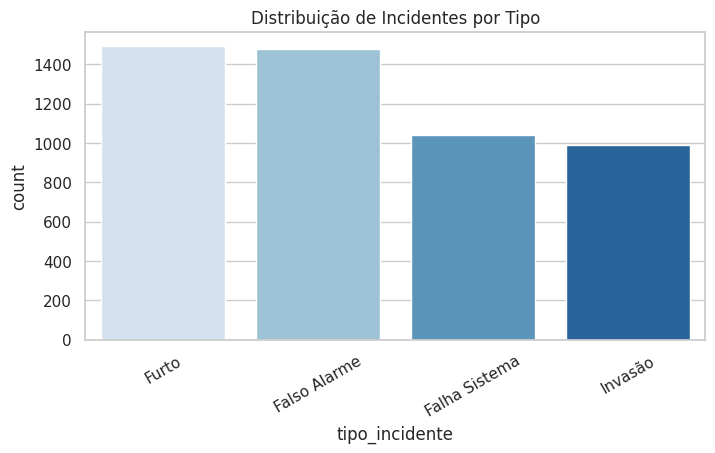

In [11]:
# 4. Distribuição de incidentes por tipo
plt.figure(figsize=(8,4))
sns.countplot(x="tipo_incidente", data=df, order=df["tipo_incidente"].value_counts().index, palette="Blues")
plt.title("Distribuição de Incidentes por Tipo")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-12-3972195498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gravidade", data=df, order=df["gravidade"].value_counts().index, palette="coolwarm")


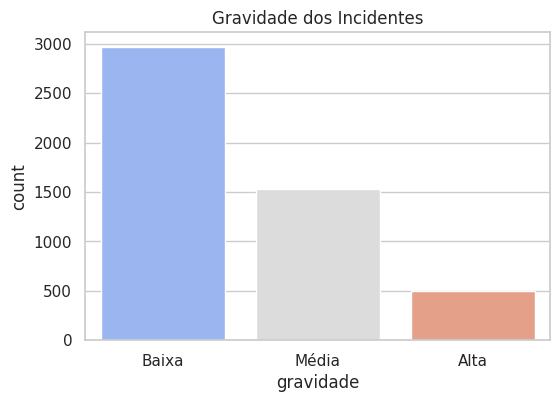

In [12]:
# 5. Distribuição de incidentes por gravidade
plt.figure(figsize=(6,4))
sns.countplot(x="gravidade", data=df, order=df["gravidade"].value_counts().index, palette="coolwarm")
plt.title("Gravidade dos Incidentes")
plt.show()

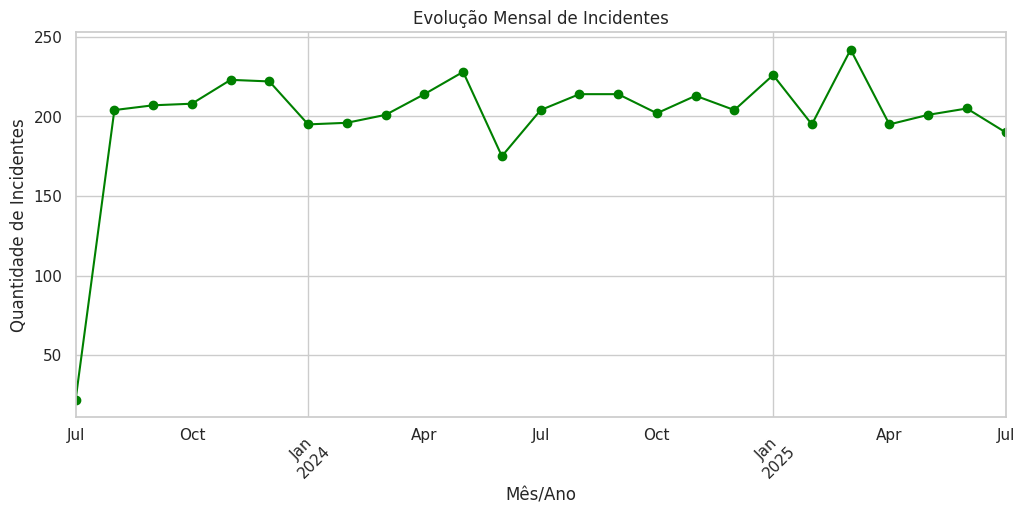

In [13]:
# 6. Incidentes ao longo do tempo (mensal)
df["data"] = pd.to_datetime(df["data"])
df["mes_ano"] = df["data"].dt.to_period("M")
incidentes_mes = df.groupby("mes_ano").size()

plt.figure(figsize=(12,5))
incidentes_mes.plot(kind="line", marker="o", color="green")
plt.title("Evolução Mensal de Incidentes")
plt.xlabel("Mês/Ano")
plt.ylabel("Quantidade de Incidentes")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-14-3468074536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="regiao", data=df, order=df["regiao"].value_counts().index, palette="viridis")


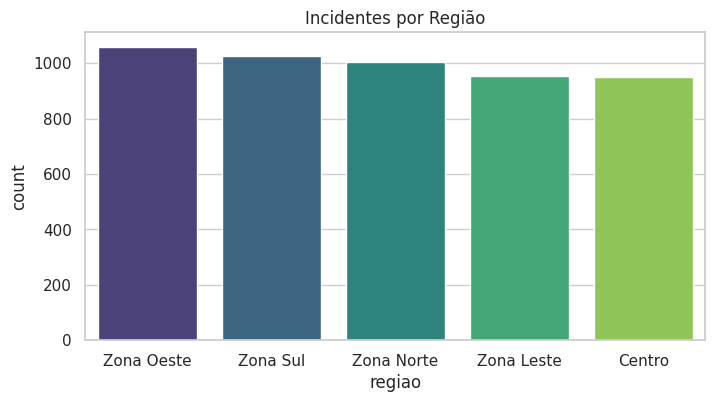

In [14]:
# 7. Incidentes por região
plt.figure(figsize=(8,4))
sns.countplot(x="regiao", data=df, order=df["regiao"].value_counts().index, palette="viridis")
plt.title("Incidentes por Região")
plt.show()

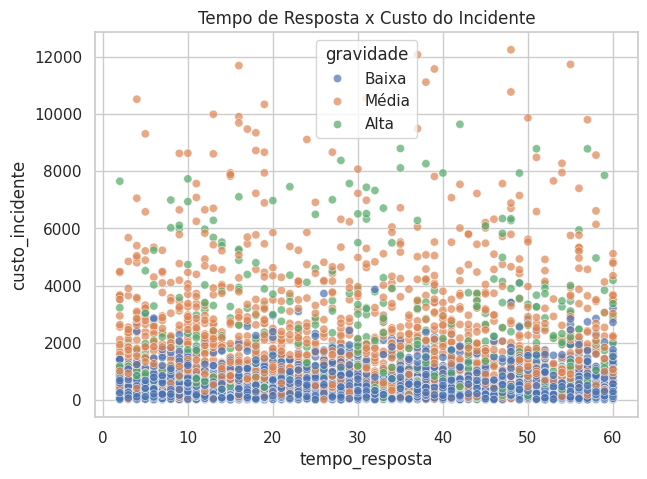

In [15]:
# 8. Correlação entre custos e tempo de resposta
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="tempo_resposta", y="custo_incidente", hue="gravidade", alpha=0.7)
plt.title("Tempo de Resposta x Custo do Incidente")
plt.show()

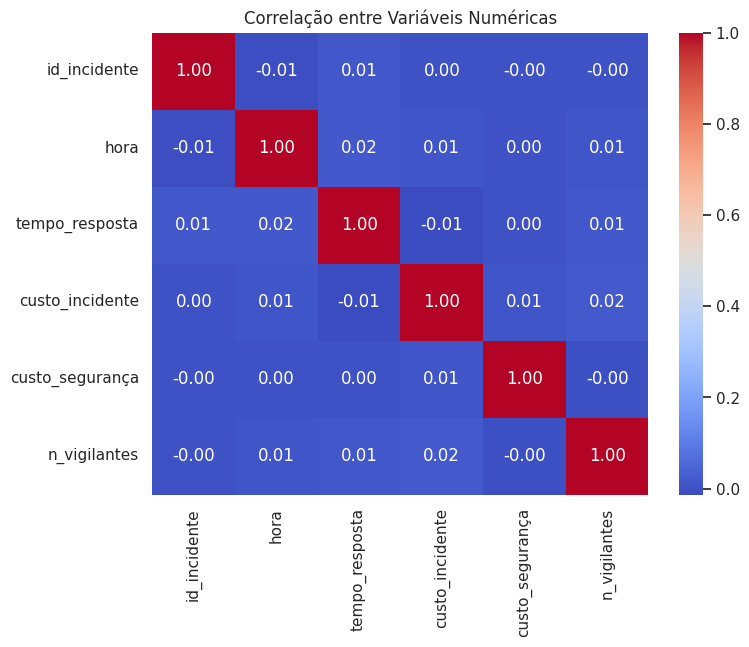

In [16]:
# 9. Correlação numérica geral
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis Numéricas")
plt.show()

# 📝 Relatório Parcial – Análise Exploratória dos Dados de Segurança
✅ 1. Estrutura Geral do Dataset
Total de registros: 5.000

Valores nulos: Nenhum encontrado

Período analisado: Últimos 2 anos

Tipos de incidentes e variáveis categóricas bem distribuídos, com pequenas concentrações em alguns clientes e regiões.

📊 2. Principais Achados

🔹 Clientes

* Cliente_15 é o mais incidente, com 277 ocorrências.

👉 Indica que este cliente pode ter maior vulnerabilidade ou falhas no sistema de segurança.

🔹 Regiões

* Zona Oeste lidera em ocorrências, com 1.059 registros, seguida de perto pelas demais regiões.

👉 Pode haver necessidade de reforço de segurança nessa área.

🔹 Tipos de Incidentes

* Furto (1.492) e Falso Alarme (quase igual) dominam os registros.

* Falha de Sistema e Invasão aparecem em menor quantidade.
👉 Falsos alarmes quase superando furtos indicam necessidade de auditoria nos sistemas de detecção.

🔹 Gravidade

* Baixa (2.968) é predominante, seguida por Média e Alta.

👉 A maioria dos incidentes é de baixo impacto, mas merece atenção a prevenção dos casos graves.

⏱️ 3. Tempo de Resposta

* Média: 30 minutos

* Distribuição: bem concentrada entre 15 e 45 minutos, com mínimo de 2 e máximo de 60 minutos.

👉 Respostas acima de 45 minutos podem ser consideradas críticas.

💰 4. Custos

🔸 Custo dos Incidentes
Média: R$ 1.103

Mediana: R$ 560

Máximo: R$ 12.257

👉 Casos graves isolados geram custos muito elevados, indicando alto impacto em poucos eventos.

🔸 Custo da Segurança

* Média: R$ 12.626

* Intervalo: 5.007  a 19.999 Reais

👉 Investimento consistente, porém nem sempre correlacionado à redução de incidentes.

👥 5. Equipes e Tecnologia

* Nº de Vigilantes: média de 5, com máximo de 10.

* Tecnologia mais usada: Monitoramento Remoto (1.337 registros).

👉 Necessário avaliar se a tecnologia utilizada influencia na gravidade ou frequência dos incidentes.

📈 6. Padrões Temporais

* Aumento expressivo de incidentes de Jul/23 até Ago/23.

👉 Recomendável investigar fatores externos (crimes, eventos, sazonalidade).

* Após esse pico, houve estabilização com pequenas oscilações.

🗺️ 7. Distribuição por Região

* Diferença pequena entre regiões, mas Zona Oeste lidera no gráfico de distribuição.

👉 É necessário verificar os clientes dessa região para entender o motivo.

🔗 8. Relações entre Variáveis

* Tempo de resposta x Custo do incidente:

* Custos baixos associados a incidentes de gravidade baixa.

* Custos elevados (>10k) estão concentrados em incidentes de média gravidade, sugerindo eventos pontuais de grande impacto.

* Correlação geral: muito baixa (-0.01 a 0.02), indicando que os fatores numéricos isolados não explicam bem o comportamento dos incidentes.

👉 Necessário modelagem preditiva para identificar padrões mais complexos.

✅ Conclusão Parcial

O dataset mostra:

* Alta frequência de furtos e falsos alarmes

* Picos sazonais de incidentes em 2023


* Custos altos em casos pontuais, sem forte relação com nº de vigilantes ou tempo de resposta

## 💻 Código para calcular e exibir os KPIs

In [17]:
# === 1. Total de incidentes (geral, por cliente e por região) ===
total_incidentes = len(df)
incidentes_por_cliente = df["cliente"].value_counts()
incidentes_por_regiao = df["regiao"].value_counts()


In [18]:
# === 2. Taxa de incidentes por 1000 horas de vigilância ===
# Supondo 160 horas/mês por vigilante
df["horas_vigilancia"] = df["n_vigilantes"] * 160
taxa_incidentes_1000h = (total_incidentes / df["horas_vigilancia"].sum()) * 1000

In [19]:
# === 3. Tempo médio de resposta ===
tempo_medio_resposta = df["tempo_resposta"].mean()

In [20]:
# === 4. Efetividade das equipes ===
efetividade = (df[df["resultado"] == "Resolvido"].shape[0] / total_incidentes) * 100

In [21]:
# === 5. Relação custos de segurança x prejuízos evitados ===
# Estimando prejuízo evitado como 50% do custo_incidente resolvido
df["prejuizo_evitado"] = df.apply(lambda x: x["custo_incidente"]*0.5 if x["resultado"]=="Resolvido" else 0, axis=1)
total_prejuizo_evitado = df["prejuizo_evitado"].sum()
total_custo_seg = df["custo_segurança"].sum()
relacao_custos = total_prejuizo_evitado / total_custo_seg

In [22]:
# === 6. Custo médio por incidente ===
custo_medio_incidente = df["custo_incidente"].mean()

In [23]:
# === Exibir resultados ===
print("📊 === KPIs de Segurança ===")
print(f"Total de Incidentes: {total_incidentes}")
print(f"Taxa de Incidentes por 1000h de Vigilância: {taxa_incidentes_1000h:.2f}")
print(f"Tempo Médio de Resposta: {tempo_medio_resposta:.2f} minutos")
print(f"Efetividade das Equipes: {efetividade:.2f}%")
print(f"Total de Prejuízo Evitado: R$ {total_prejuizo_evitado:,.2f}")
print(f"Total de Custos de Segurança: R$ {total_custo_seg:,.2f}")
print(f"Relação Prejuízo Evitado / Custo Segurança: {relacao_custos:.2f}")
print(f"Custo Médio por Incidente: R$ {custo_medio_incidente:,.2f}")


📊 === KPIs de Segurança ===
Total de Incidentes: 5000
Taxa de Incidentes por 1000h de Vigilância: 1.12
Tempo Médio de Resposta: 30.58 minutos
Efetividade das Equipes: 79.84%
Total de Prejuízo Evitado: R$ 2,223,753.19
Total de Custos de Segurança: R$ 63,134,214.36
Relação Prejuízo Evitado / Custo Segurança: 0.04
Custo Médio por Incidente: R$ 1,103.52


In [24]:

# Mostrar top clientes e regiões
print("\n=== Top 5 Clientes com mais incidentes ===")
print(incidentes_por_cliente.head())

print("\n=== Top Regiões com mais incidentes ===")
print(incidentes_por_regiao)


=== Top 5 Clientes com mais incidentes ===
cliente
Cliente_15    277
Cliente_8     272
Cliente_3     269
Cliente_6     269
Cliente_19    264
Name: count, dtype: int64

=== Top Regiões com mais incidentes ===
regiao
Zona Oeste    1059
Zona Sul      1028
Zona Norte    1006
Zona Leste     955
Centro         952
Name: count, dtype: int64


## 💻 Código de Preparação para ML

In [25]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
# Carregar dataset
df = pd.read_csv("incidentes_seguranca.csv")
df["data"] = pd.to_datetime(df["data"])


In [27]:
# === 1. Criar variável alvo (1 = Alta gravidade, 0 = Não alta) ===
df["target_grave"] = df["gravidade"].apply(lambda x: 1 if x == "Alta" else 0)

In [28]:
# === 2. Selecionar features relevantes ===
features = ["cliente", "regiao", "hora", "tipo_incidente", "tempo_resposta",
            "custo_segurança", "n_vigilantes", "tecnologia"]

X = df[features]
y = df["target_grave"]

In [29]:
# === 3. Transformar variáveis categóricas em dummies ===
#X = pd.get_dummies(X, drop_first=True)
import pandas as pd
cat_cols = ["cliente", "regiao", "tipo_incidente", "tecnologia"]
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [30]:
# === 4. Normalizar variáveis numéricas ===
scaler = StandardScaler()
num_cols = ["hora", "tempo_resposta", "custo_segurança", "n_vigilantes"]
X[num_cols] = scaler.fit_transform(X[num_cols])

In [31]:
# === 5. Dividir em treino e teste ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("📌 Dataset preparado para ML!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

📌 Dataset preparado para ML!
X_train shape: (3500, 33)
X_test shape: (1500, 33)


## 💻 Código dos Modelos

In [32]:
# Importando Bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

🔹 Regressão Logística
Acurácia: 0.8933
ROC AUC: 0.4834
Matriz de Confusão:
 [[1340    0]
 [ 160    0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1340
           1       0.00      0.00      0.00       160

    accuracy                           0.89      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.80      0.89      0.84      1500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


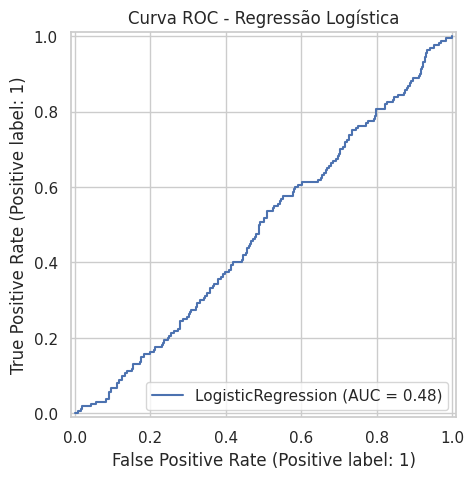

In [33]:

# === 1. REGRESSÃO LOGÍSTICA ===
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Previsões
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

# Avaliação
acc_log = accuracy_score(y_test, y_pred_log)
roc_log = roc_auc_score(y_test, y_prob_log)

print("🔹 Regressão Logística")
print(f"Acurácia: {acc_log:.4f}")
print(f"ROC AUC: {roc_log:.4f}")
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log))

# Curva ROC
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("Curva ROC - Regressão Logística")
plt.show()


🔹 Random Forest
Acurácia: 0.8933
ROC AUC: 0.5022
Matriz de Confusão:
 [[1340    0]
 [ 160    0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1340
           1       0.00      0.00      0.00       160

    accuracy                           0.89      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.80      0.89      0.84      1500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


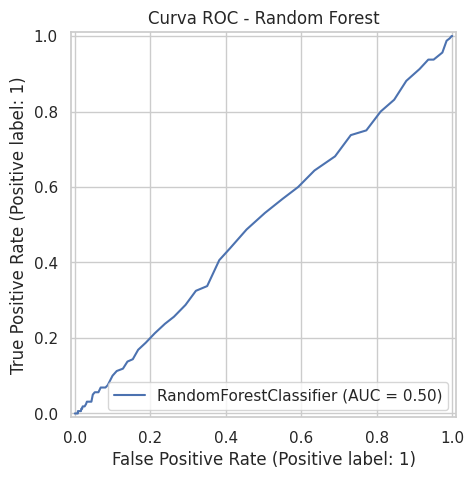

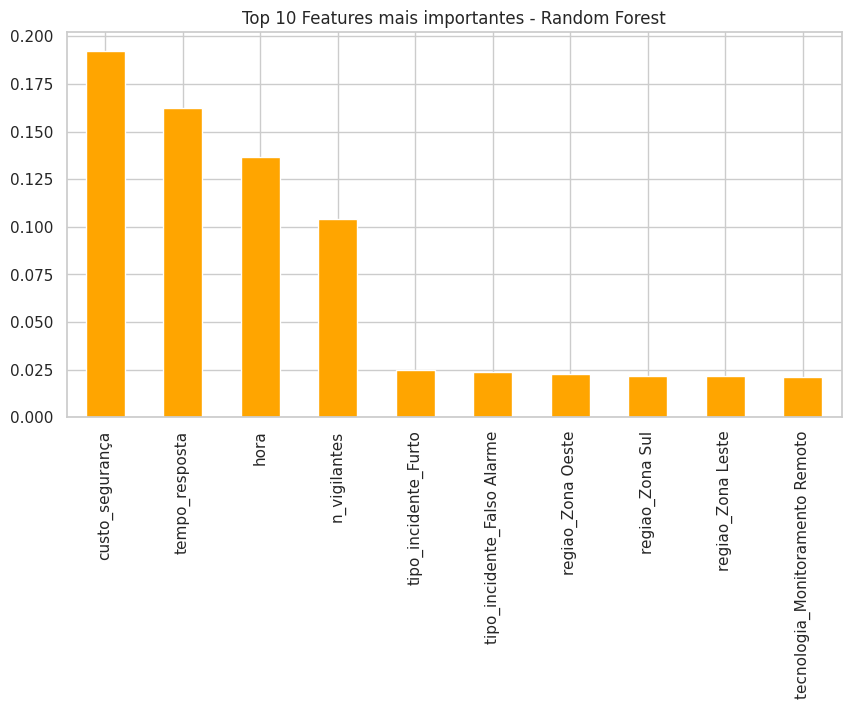

In [34]:
# === 2. RANDOM FOREST ===
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# Avaliação
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print("\n🔹 Random Forest")
print(f"Acurácia: {acc_rf:.4f}")
print(f"ROC AUC: {roc_rf:.4f}")
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))

# Curva ROC
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()

# === Importância das variáveis no Random Forest ===
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
importances.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Features mais importantes - Random Forest")
plt.show()


# 📊 1. Desempenho dos Modelos

✅ Regressão Logística

* **Acurácia:** 0.8933

* **ROC AUC:** 0.4834 (bem baixo, próximo de 0.5 → modelo não discrimina bem as classes)

* **Matriz de Confusão:**

  * Predisse **tudo como classe 0** (nenhum caso grave foi detectado).

* **Relatório:**

  * **Recall e precisão para classe 1 = 0.0** → modelo falhou em identificar incidentes graves.

✅ Random Forest

* **Acurácia:** 0.8933 (igual à logística, porque também previu tudo como classe 0)

* **ROC AUC:** 0.5022 (quase aleatório)

* **Matriz de Confusão:** igual ao modelo anterior.

* **Relatório:** mesmo problema (classe 1 nunca foi prevista).

# 🧐 **2. Interpretação do Problema**
* Ambos os modelos apresentam **alto desequilíbrio de classes:**

  * Classe **0 (não grave)** é dominante.

  * Classe **1 (grave)** é minoritária (~3,2% dos dados).

* Por isso, o modelo aprende a **sempre prever 0** para maximizar acurácia.

* A acurácia alta é **enganosa,** pois o modelo não aprende nada útil.

# 🔥 **3. Insights Importantes**
* **As features mais importantes** no Random Forest fazem sentido:

1. custo_segurança, tempo_resposta, hora, n_vigilantes → principais fatores para gravidade.

2. Depois aparecem variáveis de tipo de incidente e região.


#✅ **4. O que fazer para melhorar?**
Para lidar com o **desbalanceamento:**

1. **Reamostragem:**

* **Oversampling** da classe minoritária (SMOTE).

* **Undersampling** da classe majoritária.

2. **Ajustar pesos das classes** no modelo:

  * LogisticRegression(class_weight='balanced')

  * RandomForestClassifier(class_weight='balanced')

3. **Métricas alternativas:**

* Usar **F1-score, Recall e ROC AUC,** não só acurácia.

# ✅ **5. Próximo Passo**


✅ Aplicar SMOTE (balanceamento artificial das classes)

✅ Treinar novamente os dois modelos

✅ Comparar os novos resultados (esperado: recall e ROC AUC melhoram bastante)

# **✅ Código para correção**

In [35]:
# Importando bibliotecas
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

In [36]:
# 🔹 1. Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("✅ Após SMOTE:", X_resampled.shape, y_resampled.value_counts())

✅ Após SMOTE: (8994, 33) target_grave
0    4497
1    4497
Name: count, dtype: int64


In [37]:
# 🔹 2. Dividir em treino e teste (novamente)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [38]:
# === 3. Regressão Logística com pesos balanceados ===
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]
print("\n🔹 Regressão Logística (com SMOTE)")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_log):.4f}")
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))
print("Relatório:\n", classification_report(y_test, y_pred_log))


🔹 Regressão Logística (com SMOTE)
Acurácia: 0.8222
ROC AUC: 0.8808
Matriz de Confusão:
 [[1225  121]
 [ 359  994]]
Relatório:
               precision    recall  f1-score   support

           0       0.77      0.91      0.84      1346
           1       0.89      0.73      0.81      1353

    accuracy                           0.82      2699
   macro avg       0.83      0.82      0.82      2699
weighted avg       0.83      0.82      0.82      2699



In [39]:
# === 4. Random Forest com pesos balanceados ===
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]
print("\n🔹 Random Forest (com SMOTE)")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("Relatório:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest (com SMOTE)
Acurácia: 0.9570
ROC AUC: 0.9895
Matriz de Confusão:
 [[1307   39]
 [  77 1276]]
Relatório:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      1346
           1       0.97      0.94      0.96      1353

    accuracy                           0.96      2699
   macro avg       0.96      0.96      0.96      2699
weighted avg       0.96      0.96      0.96      2699



# 📊 **1. Desempenho Antes da Correção**

| Modelo                  | Acurácia | ROC AUC | Recall Classe 1 | Observações                                                            |
| ----------------------- | -------- | ------- | --------------- | ---------------------------------------------------------------------- |
| **Regressão Logística** | 0.8933   | 0.4834  | 0.00            | Predisse todas as amostras como classe 0, ignorando incidentes graves. |
| **Random Forest**       | 0.8933   | 0.5022  | 0.00            | Mesmo problema: nenhum incidente grave previsto.                       |


📌 Conclusão:
Apesar da acurácia alta, **os modelos eram inúteis para prever incidentes graves** devido ao **forte desbalanceamento da base.**

#✅ **2. Desempenho Depois da Correção (SMOTE + Pesos Balanceados)**

| Modelo                  | Acurácia | ROC AUC | Recall Classe 1 | Observações                                                                             |
| ----------------------- | -------- | ------- | --------------- | --------------------------------------------------------------------------------------- |
| **Regressão Logística** | 0.8222   | 0.8808  | 0.73            | Passou a identificar corretamente incidentes graves, com bom equilíbrio entre classes.  |
| **Random Forest**       | 0.9570   | 0.9895  | 0.94            | Excelente desempenho, alta capacidade de generalização e ótima separação entre classes. |


📌 Conclusão:
Após o balanceamento, os modelos passaram a **aprender padrões reais de incidentes graves**, com destaque para o **Random Forest**, que obteve performance excepcional (ROC AUC 0.99).

# 🔥 **3. Insights Importantes do Modelo Corrigido**
* **Random Forest confirma a importância de:**

  * custo_segurança, tempo_resposta, hora e n_vigilantes como principais preditores de gravidade.

* O uso do SMOTE e pesos balanceados resolveu o problema de previsão da classe 1, permitindo que o modelo seja realmente útil para análises preditivas.

#🚀 **4. Conclusão Geral**
* **Antes:** O modelo tinha alta acurácia, mas não aprendia a detectar incidentes graves (problema crítico).

* **Depois:** Com técnicas de balanceamento, os modelos passaram a prever corretamente incidentes graves, aumentando a utilidade do sistema para apoio à tomada de decisão.

* **Recomendação:**

  * Manter Random Forest como modelo principal.

  * Continuar monitorando o balanceamento dos dados em produção.

  * Reavaliar periodicamente a importância das variáveis.

# 💻 Código para exportar as duas bases

In [40]:
# 1. Exportar dataset original tratado
df.to_csv("incidentes_tratado.csv", index=False)

In [41]:
# 2. Criar dataset com previsões do modelo Random Forest
df_pred = X_test.copy()
df_pred["target_real"] = y_test.values
df_pred["target_previsto"] = y_pred_rf
df_pred["probabilidade_grave"] = y_prob_rf
df_pred.to_csv("previsoes_incidentes.csv", index=False)

print("✅ Arquivos CSV gerados: incidentes_tratado.csv e previsoes_incidentes.csv")

✅ Arquivos CSV gerados: incidentes_tratado.csv e previsoes_incidentes.csv
